# Research Question

How does the borough/neighborhood one lives in New York City and their demographic affect ones quality of life including rent burden, accessibility to healthcare, and education?

In our project, we chose to look at multiple datasets to see these varying trends and answer different parts of our questions.


## Research Question Part 1

What are the trends in rent burdens across New York City for different boroughs?

We used NYC Open Data on [Housing Data](https://data.cityofnewyork.us/City-Government/Demographics-and-profiles-at-the-Neighborhood-Tabu/hyuz-tij8) to help answer our question.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

First, we loaded out dataset and subsetted the data to only include values of percent of income spent on rent -- measuring burden of rent on a household. Additionally, we removed the last columns that included values for the Staten Island Cemetery.

In [22]:
# load csv and dropping rows
rent = pd.read_csv("rent.csv", skiprows=5)


# number of rows to drop 
n = 22
  
# dropping last n rows using drop 
rent.drop(rent.tail(n).index, inplace = True) 

# check
# print(rent.tail())

# keep only rent burden rows
rent_burden = rent[142:-1]


# remove Staten Island Cemetery column
rent_burden = rent_burden.iloc[:,:-4]


# check
display(rent_burden.tail())

,Unnamed: 0,BK72 Williamsburg,Unnamed: 2,Unnamed: 3,Unnamed: 4,BK73 North Side-South Side,BK73 North Side-South Side.1,BK73 North Side-South Side.2,BK73 North Side-South Side.3,BK76 Greenpoint,...,SI32 Rossville-Woodrow.2,SI32 Rossville-Woodrow.3,SI48 Arden Heights,SI48 Arden Heights.1,SI48 Arden Heights.2,SI48 Arden Heights.3,SI54 Great Kills,SI54 Great Kills.1,SI54 Great Kills.2,SI54 Great Kills.3
145,20.0 to 24.9 percent,399,146,5.7,2.1,"2,057",308,13.0,1.9,"1,697",...,19.5,12.6,159,100,14.2,8.3,302,144,14.3,6.4
146,25.0 to 29.9 percent,678,175,9.8,2.5,"1,654",285,10.4,1.8,"1,432",...,4.3,5.6,61,67,5.4,5.8,241,134,11.4,6.1
147,30.0 to 34.9 percent,625,170,9.0,2.4,"1,636",297,10.3,1.9,"1,020",...,4.2,4.1,8,13,0.7,1.1,28,25,1.3,1.2
148,35.0 percent or more,"3,988",315,57.4,3.9,"6,652",486,42.0,2.8,"4,253",...,39.4,12.0,469,170,41.8,11.6,853,216,40.4,7.9
149,Not computed,200,99,2.9,1.4,464,152,2.9,1.0,574,...,15.0,8.3,177,115,15.8,9.5,221,109,10.5,4.9


Next, we cleaned the data further by only looking at the estimates for each location by rent burden. We subsetted the data to only count every fourth column starting from the index 0 column, then we inserted back the description column into the dataframe.

In [23]:
# get rid of MOE, Percent and Percent MOE columns - keep only estimates
rent_burden_estimates = rent_burden.iloc[:,1::4].copy()
# save the row names
rent_burden_row = rent_burden.iloc[:, 0].copy()
# insert first column back into dataframe
rent_burden_estimates.insert(0, 'GRAPI', rent_burden_row)

# check
display(rent_burden_estimates.head())

,GRAPI,BK72 Williamsburg,BK73 North Side-South Side,BK76 Greenpoint,BK90 East Williamsburg,BK09 Brooklyn Heights-Cobble Hill,BK38 DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,BK68 Fort Greene,BK69 Clinton Hill,BK35 Stuyvesant Heights,...,SI14 Grasmere-Arrochar-Ft. Wadsworth,SI24 Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill,SI36 Old Town-Dongan Hills-South Beach,SI45 New Dorp-Midland Beach,SI01 Annadale-Huguenot-Prince's Bay-Eltingville,SI11 Charleston-Richmond Valley-Tottenville,SI25 Oakwood-Oakwood Beach,SI32 Rossville-Woodrow,SI48 Arden Heights,SI54 Great Kills
142,Occupied units paying rent (excl. units where ...,"6,952","15,842","11,691","12,117","6,092","11,053","8,751","9,271","17,539",...,"1,711","2,036","2,676","1,742","1,399","1,508","2,300","1,085","1,123","2,114"
143,Less than 15.0 percent,886,"2,002","1,809","1,437","1,264","1,848","1,275","1,213","1,927",...,236,263,367,298,194,192,289,130,156,227
144,15.0 to 19.9 percent,376,"1,841","1,480","1,611",961,"1,638","1,177","1,246","1,895",...,223,306,282,169,240,186,389,222,270,463
145,20.0 to 24.9 percent,399,"2,057","1,697","1,789",984,"1,601","1,205","1,303","1,998",...,186,281,303,178,207,153,234,212,159,302
146,25.0 to 29.9 percent,678,"1,654","1,432","1,528",840,"1,506","1,176","1,106","1,991",...,205,159,181,156,131,138,275,47,61,241


To further clean our data, we transposed the dataframe for ease of renaming the rows. We took the transposed dataframe and renamed the columns to easier to understand strings and dropped the row that included the harder to read descriptions.

Furthermore, we removed the commas from the numbers so they can be used in calculations and then we transposed the dataframe back.

In [24]:
rent_burden_estimates_t = rent_burden_estimates.T
rent_burden_estimates_t.rename(columns = {142 : 'occupied_units', 143 : '<15%', 144 : '15.0-19.9%', 145 : '20-24.9%', 146 : '25-29.9%',
                                         147 : '30-34.9%', 148 : '>35%', 149 : 'not_computed', 150 : 'average'}, inplace = True)

rent_burden_estimates_t= rent_burden_estimates_t.iloc[1:,1:7]

rent_burden_estimates_t = rent_burden_estimates_t.replace(',','', regex=True)

# display(rent_burden_estimates_t.head())
# print(rent_burden_estimates_t.tail())

rent_burden_estimates = rent_burden_estimates_t.T

display(rent_burden_estimates.head())

,BK72 Williamsburg,BK73 North Side-South Side,BK76 Greenpoint,BK90 East Williamsburg,BK09 Brooklyn Heights-Cobble Hill,BK38 DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,BK68 Fort Greene,BK69 Clinton Hill,BK35 Stuyvesant Heights,BK75 Bedford,...,SI14 Grasmere-Arrochar-Ft. Wadsworth,SI24 Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill,SI36 Old Town-Dongan Hills-South Beach,SI45 New Dorp-Midland Beach,SI01 Annadale-Huguenot-Prince's Bay-Eltingville,SI11 Charleston-Richmond Valley-Tottenville,SI25 Oakwood-Oakwood Beach,SI32 Rossville-Woodrow,SI48 Arden Heights,SI54 Great Kills
<15%,886,2002,1809,1437,1264,1848,1275,1213,1927,1978,...,236,263,367,298,194,192,289,130,156,227
15.0-19.9%,376,1841,1480,1611,961,1638,1177,1246,1895,2101,...,223,306,282,169,240,186,389,222,270,463
20-24.9%,399,2057,1697,1789,984,1601,1205,1303,1998,1817,...,186,281,303,178,207,153,234,212,159,302
25-29.9%,678,1654,1432,1528,840,1506,1176,1106,1991,2142,...,205,159,181,156,131,138,275,47,61,241
30-34.9%,625,1636,1020,1094,253,1024,878,727,1896,1832,...,169,157,392,118,143,194,217,46,8,28


In order to divide all the locations up by borough, we created a median esimates column for each of the boroughs by indexing where it started with the borough indicator.

In [25]:
rent_burden_estimates['brooklyn'] = rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('BK')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('BK')])
print(rent_burden_estimates['brooklyn'])


rent_burden_estimates['bronx'] = rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('BX')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('BX')])
# print(rent_burden_estimates['bronx'])

rent_burden_estimates['manhattan'] = rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('MN')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('MN')])
# print(rent_burden_estimates['manhattan'])

rent_burden_estimates['queens'] = rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('QN')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('QN')])
# print(rent_burden_estimates['queens'])

rent_burden_estimates['staten'] = rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('SI')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('SI')])
# print(rent_burden_estimates['staten'])

<15%          1275.0
15.0-19.9%    1177.0
20-24.9%      1258.0
25-29.9%      1173.0
30-34.9%       961.0
>35%          4520.0
Name: brooklyn, dtype: float64


We realized that just looking at the estimates did not give us an accurate view of what we wanted. Instead, we will look at the median percent of households by borough by rent burden. We went back to our first round of cleaning, we cleaned the data further by only looking at the percent for each location by rent burden. We subsetted the data to only count every fourth column starting from the index 3 column, then we inserted back the description column into the dataframe.

In [26]:
# get rid of estimates, MOE and Percent MOE columns - keep only percents
rent_burden_percent = rent_burden.iloc[:,3::4].copy()
# save the row names
rent_burden_row = rent_burden.iloc[:, 0].copy()
# insert first column back into dataframe
rent_burden_percent.insert(0, 'GRAPI', rent_burden_row)

# check
display(rent_burden_percent.head())

,GRAPI,Unnamed: 3,BK73 North Side-South Side.2,BK76 Greenpoint.2,BK90 East Williamsburg.2,BK09 Brooklyn Heights-Cobble Hill.2,BK38 DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill.2,BK68 Fort Greene.2,BK69 Clinton Hill.2,BK35 Stuyvesant Heights.2,...,SI14 Grasmere-Arrochar-Ft. Wadsworth.2,SI24 Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill.2,SI36 Old Town-Dongan Hills-South Beach.2,SI45 New Dorp-Midland Beach.2,SI01 Annadale-Huguenot-Prince's Bay-Eltingville.2,SI11 Charleston-Richmond Valley-Tottenville.2,SI25 Oakwood-Oakwood Beach.2,SI32 Rossville-Woodrow.2,SI48 Arden Heights.2,SI54 Great Kills.2
142,Occupied units paying rent (excl. units where ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
143,Less than 15.0 percent,12.7,12.6,15.5,11.9,20.7,16.7,14.6,13.1,11.0,...,13.8,12.9,13.7,17.1,13.9,12.7,12.6,12.0,13.9,10.7
144,15.0 to 19.9 percent,5.4,11.6,12.7,13.3,15.8,14.8,13.4,13.4,10.8,...,13.0,15.0,10.5,9.7,17.2,12.3,16.9,20.5,24.0,21.9
145,20.0 to 24.9 percent,5.7,13.0,14.5,14.8,16.2,14.5,13.8,14.1,11.4,...,10.9,13.8,11.3,10.2,14.8,10.1,10.2,19.5,14.2,14.3
146,25.0 to 29.9 percent,9.8,10.4,12.2,12.6,13.8,13.6,13.4,11.9,11.4,...,12.0,7.8,6.8,9.0,9.4,9.2,12.0,4.3,5.4,11.4


For the following lines, we redid the operations we used on the rent_burden_estimates dataframe and did it with rent_burden_percent instead -- renaming the columns to transpose back into rows, creating an median percent column by borough, and then plotting a line plot that displayed median percent of rent burden by borough.

In [27]:
rent_burden_percent_t = rent_burden_percent.T
rent_burden_percent_t.rename(columns = {142 : 'occupied_units', 143 : '<15%', 144 : '15.0-19.9%', 145 : '20-24.9%', 146 : '25-29.9%',
                                         147 : '30-34.9%', 148 : '>35%', 149 : 'not_computed', 150 : 'average'}, inplace = True)

rent_burden_percent_t= rent_burden_percent_t.iloc[1:,1:7]


# print(rent_burden_percent_t.head())
# print(rent_burden_estimates_t.tail())

rent_burden_percent = rent_burden_percent_t.T

(rent_burden_percent.head())

,Unnamed: 3,BK73 North Side-South Side.2,BK76 Greenpoint.2,BK90 East Williamsburg.2,BK09 Brooklyn Heights-Cobble Hill.2,BK38 DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill.2,BK68 Fort Greene.2,BK69 Clinton Hill.2,BK35 Stuyvesant Heights.2,BK75 Bedford.2,...,SI14 Grasmere-Arrochar-Ft. Wadsworth.2,SI24 Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill.2,SI36 Old Town-Dongan Hills-South Beach.2,SI45 New Dorp-Midland Beach.2,SI01 Annadale-Huguenot-Prince's Bay-Eltingville.2,SI11 Charleston-Richmond Valley-Tottenville.2,SI25 Oakwood-Oakwood Beach.2,SI32 Rossville-Woodrow.2,SI48 Arden Heights.2,SI54 Great Kills.2
<15%,12.7,12.6,15.5,11.9,20.7,16.7,14.6,13.1,11.0,10.7,...,13.8,12.9,13.7,17.1,13.9,12.7,12.6,12.0,13.9,10.7
15.0-19.9%,5.4,11.6,12.7,13.3,15.8,14.8,13.4,13.4,10.8,11.3,...,13.0,15.0,10.5,9.7,17.2,12.3,16.9,20.5,24.0,21.9
20-24.9%,5.7,13.0,14.5,14.8,16.2,14.5,13.8,14.1,11.4,9.8,...,10.9,13.8,11.3,10.2,14.8,10.1,10.2,19.5,14.2,14.3
25-29.9%,9.8,10.4,12.2,12.6,13.8,13.6,13.4,11.9,11.4,11.6,...,12.0,7.8,6.8,9.0,9.4,9.2,12.0,4.3,5.4,11.4
30-34.9%,9.0,10.3,8.7,9.0,4.2,9.3,10.0,7.8,10.8,9.9,...,9.9,7.7,14.6,6.8,10.2,12.9,9.4,4.2,0.7,1.3


In [28]:
rent_burden_estimates_t = rent_burden_estimates.T
rent_burden_estimates_t.rename(columns = {142 : 'occupied_units', 143 : '<15%', 144 : '15.0-19.9%', 145 : '20-24.9%', 146 : '25-29.9%',
                                         147 : '30-34.9%', 148 : '>35%', 149 : 'not_computed', 150 : 'average'}, inplace = True)

rent_burden_estimates_t= rent_burden_estimates_t.iloc[1:,1:7]

rent_burden_estimates_t = rent_burden_estimates_t.replace(',','', regex=True)

# print(rent_burden_estimates_t.head())
# print(rent_burden_estimates_t.tail())

rent_burden_estimates = rent_burden_estimates_t.T

display(rent_burden_estimates.head())

,BK73 North Side-South Side,BK76 Greenpoint,BK90 East Williamsburg,BK09 Brooklyn Heights-Cobble Hill,BK38 DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,BK68 Fort Greene,BK69 Clinton Hill,BK35 Stuyvesant Heights,BK75 Bedford,BK77 Bushwick North,...,SI11 Charleston-Richmond Valley-Tottenville,SI25 Oakwood-Oakwood Beach,SI32 Rossville-Woodrow,SI48 Arden Heights,SI54 Great Kills,brooklyn,bronx,manhattan,queens,staten
15.0-19.9%,1841,1480,1611,961,1638,1177,1246,1895,2101,1477,...,186,389,222,270,463,1177,950.5,1939,562.5,310
20-24.9%,2057,1697,1789,984,1601,1205,1303,1998,1817,1574,...,153,234,212,159,302,1258,980.5,2122,595.5,282
25-29.9%,1654,1432,1528,840,1506,1176,1106,1991,2142,1607,...,138,275,47,61,241,1173,1008.5,2124,527,193
30-34.9%,1636,1020,1094,253,1024,878,727,1896,1832,1569,...,194,217,46,8,28,961,857.5,1602,424.5,167.5
>35%,6652,4253,4658,1790,3436,3040,3676,7832,8656,8221,...,645,896,428,469,853,4520,4566.5,7310,2318,883


In [29]:
rent_burden_percent['brooklyn'] = rent_burden_percent.loc[:,rent_burden_percent.columns.str.startswith('BK')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('BK')])
# print(rent_burden_percent['brooklyn'])


rent_burden_percent['bronx'] = rent_burden_percent.loc[:,rent_burden_percent.columns.str.startswith('BX')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('BX')])
# print(rent_burden_estimates['bronx'])

rent_burden_percent['manhattan'] = rent_burden_percent.loc[:,rent_burden_percent.columns.str.startswith('MN')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('MN')])
# print(rent_burden_estimates['manhattan'])

rent_burden_percent['queens'] = rent_burden_percent.loc[:,rent_burden_percent.columns.str.startswith('QN')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('QN')])
# print(rent_burden_estimates['queens'])

rent_burden_percent['staten'] = rent_burden_percent.loc[:,rent_burden_percent.columns.str.startswith('SI')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('SI')])
# print(rent_burden_estimates['staten'])

Finally, we subsetted our dataframe to only include the average borough columns.

In [30]:
# subset to only include average borough columns
rent_burden_percent = rent_burden_percent[['brooklyn', 'bronx', 'manhattan', 'queens', 'staten']] 
display(rent_burden_percent)

,brooklyn,bronx,manhattan,queens,staten
<15%,11.75,9.65,17.6,11.40,12.65
15.0-19.9%,10.55,9.75,11.8,11.40,13.00
20-24.9%,11.60,9.95,11.8,12.00,11.50
25-29.9%,11.20,10.30,11.2,10.70,9.35
30-34.9%,9.15,9.40,8.7,8.85,7.55
>35%,45.95,49.60,35.4,45.25,42.75


## Data Description
* The original dataset had different rows be the housing characteristics from rent, household type, rent burden, etc… and the columns were the different neighborhoods. The cleaned data set had the rows be the percent burden of rent and the columns be the five boroughs in NYC.
* This dataset was created as a part of an initiative to increase transparency, accessibility, and accountability of the City government.
* According to their website, NYC Open Data makes the wealth of public data generated by various New York City agencies and other City organizations available for public use. It is funded by the New York City government. This specific dataset was provided by the Department of City Planning.
* Many different politics/policies in NYC affect what type of data is collected. There are many different reasons why these estimates might not be an accurate representation of differences across boroughs including homelessness, lack of documentation, people over or underreporting their income, etc… 
* We dropped rows of unnecessary housing data that did not look at the rent burden. We also dropped unnecessary neighborhoods that had missing values such as the Staten Island Cemetery. We further cleaned the data by only looking at the median estimates by borough, and median percent estimates by borough and dropped all other columns.
* Since this is not personalized data, the people involved might not be fully aware that their data is being used and collected. However, since it is in aggregate form there should be no privacy or expectation concerns.
* The raw dataset can be found [here](https://drive.google.com/file/d/1mL4DjAYRaL2f184_WdoQd-u0ETNvYvgU/view?usp=sharing).

## Data Explanation
In this finalized dataset, we see the median percent of households that are under each division of rent burden by each borough in New York City. Across all boroughs, residents spend a very large amount of their income on rent. 

While the differences in rent burden between boroughs do not seem that jarring, one large difference is what we see residents in the Bronx pay as a percent of their income vs residents in Manhattan. The percentage of residents that spend more than 35% of their income on living is nearly 50%, while the percent of residents that pay the same income burden on rent in Manhattan is only 35%. If we were also to compare [poverty levels](https://www1.nyc.gov/site/opportunity/poverty-in-nyc/data-tool.page) from the same time end - 2012, we see that Staten Island held the lowest poverty level at 13.4%, Manhattan the second lowest at 14.7%, Queens at 21.8%, Brooklyn at 22.3%, and the Bronx at 25.2%. 

The comparisons between poverty and income show us that in neighborhoods that face higher poverty levels, they may actually be more burdened by rent than their wealthier counterparts. This demonstrates a discrepancy in the quality of life and wealth that can be accumulated across boroughs.


## Data Limitiations
This data shows five year estimates from 2008-2012, so we don't get a glimpse of what is happening year to year and how the rent burden is changing for each district -- it might be getting better or worse for some districts and we cannot exactly tell from the data. Furthermore, this data is quite old and does not take into acccount recent political events and policies that likely have afffected housing policy in NYC.

## Initial Analysis
We looked at a line plot that compared our average rent burden percents by borough.

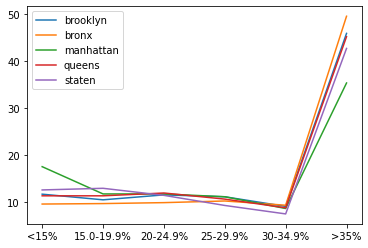

In [31]:
rent_burden_percent.plot.line()
plt.show()

## Research Question Part 2

What are the trends in healthcare accessibility across New York City for different neighborhood?


In [64]:
#reading the csv file 
health = pd.read_csv('health.csv')
health.head()

,cid,survey,wt20_dual,wt20_dual_q1,qxvers,mood1,mood2,mood3,mood4,mood5,...,sexaslttouch,sexasltrape,dvscreen,wt_compare,strata,strata_q1,bthcntrltype19,insure19r,hhsize,child
0,2000001,20,1014.111405,1298.712123,1,5,5,5,5,4,...,2.0,2.0,2.0,1014.111405,20191402,20191402.0,NaN,1.0,2,2.0
1,2000002,20,60.653305,147.643223,1,5,3,3,3,3,...,2.0,2.0,2.0,60.653305,20191309,20191309.0,NaN,3.0,1,2.0
2,2000003,20,75.367704,108.963691,1,5,4,5,5,5,...,2.0,2.0,2.0,75.367704,20191402,20191402.0,NaN,3.0,1,2.0
3,2000004,20,1015.285504,NaN,2,5,4,5,5,3,...,2.0,2.0,2.0,1015.285504,20199399,NaN,NaN,1.0,3,1.0
4,2000005,20,223.768505,387.054275,1,5,5,5,5,5,...,2.0,2.0,2.0,223.768505,20191207,20191207.0,NaN,NaN,1,2.0


In [65]:
#how much data
health.shape

(8253, 152)

In [66]:
#grabbing columns from data set
columns_we_want = [ "insuredgateway19","generalhealth", "visitnonpcp12m19", "pcp19","didntgetcare19","emp3", "insure5","birthsex","imputed_neighpovgroup4_1418", "fluvaccineshot","everhepavaccine","fruitveg19"]
health[columns_we_want]
health = health[columns_we_want]

In [67]:
#renaming columns
health = health.rename(columns = {'insuredgateway19' : 'insured', 'visitnonpcp12m19' : 'seen_a_doctor_in_12months?', 'pcp19' : 'primary_doctor', 'insure5': 'who_insures_you','emp3': 'employed', 'imputed_neighpovgroup4_1418': 'below_poverty','fruitveg19':'fruit_veggie_servings','everhepavaccine': 'revieved_hepatatis_vaccine','didntgetcare19': 'didnt_get_care'})
health.head()

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didnt_get_care,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,2,1.0,3.0,2.0
1,1.0,2.0,2.0,NaN,2.0,3.0,2.0,2.0,2,2.0,2.0,1.0
2,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,2,1.0,3.0,2.0
3,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3,2.0,2.0,2.0
4,1.0,2.0,2.0,1.0,2.0,3.0,NaN,2.0,4,2.0,2.0,2.0


In [68]:
# describing the basics of the numerical data using the describe varaibles
health.describe()

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didnt_get_care,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
count,8213.000000,8227.000000,8238.000000,8207.000000,8205.000000,8172.000000,8026.000000,8224.000000,8253.000000,8178.000000,8243.000000,8028.000000
mean,1.094241,2.696973,1.127337,1.139515,1.880073,1.778512,2.172315,1.561527,2.389192,1.492541,1.823972,2.051570
std,0.292181,1.121782,0.333370,0.346504,0.324896,0.943068,1.302893,0.496230,0.937318,0.499975,0.720247,0.492456
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,2.000000,5.000000,2.000000,2.000000,2.000000,3.000000,5.000000,2.000000,4.000000,2.000000,3.000000,3.000000


In [69]:
#Renaming data points in below_poverty and other columns I am preforming analysis on so that the data is understandable to the user. 
health_copy1 = health.copy()
# health_copy1.loc[health_copy1.below_poverty == 1, "below_poverty"] = "0 - <10%"
# health_copy1.loc[health_copy1.below_poverty == 2, "below_poverty"] = "10 - <20%"
# health_copy1.loc[health_copy1.below_poverty == 3, "below_poverty"] = "20 - <30%"
# health_copy1.loc[health_copy1.below_poverty == 4, "below_poverty"] = "30 - <100%"

health_copy1.loc[health_copy1.insured == 1, "insured"] = "yes"
health_copy1.loc[health_copy1.insured == 2, "insured"] = "no"

health_copy1.loc[health_copy1.primary_doctor == 1, "primary_doctor"] = "yes"
health_copy1.loc[health_copy1.primary_doctor == 2, "primary_doctor"] = "no"

health_copy1.loc[health_copy1.didnt_get_care == 1, "didnt_get_care"] = "yes"
health_copy1.loc[health_copy1.didnt_get_care == 2, "didnt_get_care"] = "no"

health_copy1.loc[health_copy1.below_poverty == 1, "below_poverty"] = "<9.9%"
health_copy1.loc[health_copy1.below_poverty == 2, "below_poverty"] = "10-19.9%"
health_copy1.loc[health_copy1.below_poverty == 3, "below_poverty"] = "20-29.9%"
health_copy1.loc[health_copy1.below_poverty == 4, "below_poverty"] = ">30%"


display(health_copy1.head())

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didnt_get_care,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
0,yes,3.0,1.0,yes,no,3.0,1.0,2.0,10-19.9%,1.0,3.0,2.0
1,yes,2.0,2.0,NaN,no,3.0,2.0,2.0,10-19.9%,2.0,2.0,1.0
2,yes,2.0,1.0,yes,no,3.0,2.0,1.0,10-19.9%,1.0,3.0,2.0
3,yes,2.0,1.0,yes,no,1.0,1.0,2.0,20-29.9%,2.0,2.0,2.0
4,yes,2.0,2.0,yes,no,3.0,NaN,2.0,>30%,2.0,2.0,2.0


Text(0.5, 1.0, 'distribution of residents living in specific income neighborhoods')

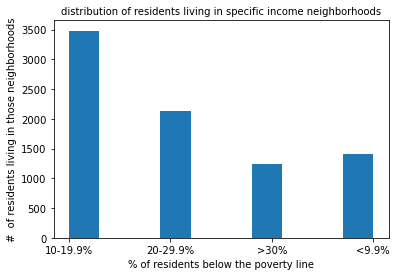

In [71]:
plt.hist(health_copy1['below_poverty'])
plt.xlabel('% of residents below the poverty line',fontsize=10)
plt.ylabel("#  of residents living in those neighborhoods",fontsize=10)
plt.title('distribution of residents living in specific income neighborhoods',fontsize=10)

In [72]:
group_poverty = health_copy1.groupby('below_poverty').insured
insured_poverty= group_poverty.value_counts(normalize=True)*100
print(insured_poverty)

below_poverty  insured
10-19.9%       yes        91.601732
               no          8.398268
20-29.9%       yes        88.568729
               no         11.431271
<9.9%          yes        94.408602
               no          5.591398
>30%           yes        86.812298
               no         13.187702
Name: insured, dtype: float64


This analysis shows that as the below poverty percentage increases (more people in that neighborhood are living in poverity) then the percent of people insured decreases. As the number of people in poverty increases, the percent of those with insurance decreases by about an increment of about 3% each time. This creates an approximate 8% differnce in those insured in the neighborhoods with the lowest poverty rate to the highest.

In [73]:
group_poverty2 = health_copy1.groupby('below_poverty').primary_doctor
dr_poverty = group_poverty2.value_counts(normalize=True)*100
print(dr_poverty)

below_poverty  primary_doctor
10-19.9%       yes               86.506790
               no                13.493210
20-29.9%       yes               84.615385
               no                15.384615
<9.9%          yes               89.892473
               no                10.107527
>30%           yes               82.873377
               no                17.126623
Name: primary_doctor, dtype: float64


In [74]:
group_poverty3 = health_copy1.groupby('below_poverty').didnt_get_care
didnt_poverty = group_poverty3.value_counts(normalize=True)*100
print(didnt_poverty)

below_poverty  didnt_get_care
10-19.9%       no                88.940225
               yes               11.059775
20-29.9%       no                87.269285
               yes               12.730715
<9.9%          no                90.021536
               yes                9.978464
>30%           no                84.385113
               yes               15.614887
Name: didnt_get_care, dtype: float64


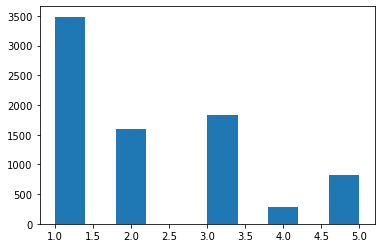

In [75]:
# i want to make a group by so i can see the distribution of what insuraunce each neighborhood has 
plt.hist(health_copy1['who_insures_you'])
#plt.xlabel('% of residents below the poverty line',fontsize=15)
#plt.ylabel("#  of residents living in those neighborhoods",fontsize=15)
#plt.title('distribution of residents living in specific income neighborhoods',fontsize=15)
plt.show()

## Data Limitations:
The data in the health survery is all categorial data that is represented by numerical values. While some computations can be peformed on the data, this data set is best used in calulating percentages and showing distribution. When trying to show correlation in a scatterplot the results are inconclusive becasue there are only x amount of categories that the population can fall into. 

## Data explanation: 
This data set is created from a survery given to indivuals in NYC. The data set explores the general health of these residents as well other demographics such as income, gender, etc. The data is all categorical, but is represented as numbers in the dataset. In the finalized data sets we can see how poverty levels in NYC neighborhoods affect an indivuals access to healthcare. The data set can show this relationship by comparing the % of people below poverty in a specific neighborhood to the number of people insured, the number of people who have a regular doctor, and accessiblitiy to needed care. Additionally, this data set can begin to explore access to nutitious foods and vaccinations; however, there may be outside factors that also influence these demograohics that may not be directly seen through income levels.
NOTE: This data set is currently incomplete and we are attempting to get access to boroughs and other demographic information that is not for publce use.

## Research Question Part 3

In [4]:
## load data
school_data = pd.read_csv("Ny_School.csv")
housing_data = pd.read_csv("Student_Temp_Housing.csv")

#### Renaming Columns
In this section, we renamed the columns by making them lower_case and replacing spaces in order to make them easier to work with.

In [5]:
new_colnames = []
for col in school_data.columns:
    new_colnames.append(col.lower())
    
new_colnames_2 = []
for col in housing_data.columns:
    new_colnames_2.append(col.lower())

In [6]:
for col in range(len(new_colnames)):
    new_colnames[col] = new_colnames[col].replace(" ", "_")
print (new_colnames)

sdata = school_data.copy()
sdata.columns = new_colnames

for col in range(len(new_colnames_2)):
    new_colnames_2[col] = new_colnames_2[col].replace(" ", "_")
print (new_colnames_2)

sdata = school_data.copy()
sdata.columns = new_colnames

hdata = housing_data.copy()
hdata.columns = new_colnames_2

['dbn', 'school_name', 'year', 'total_enrollment', 'grade_pk_(half_day_&_full_day)', 'grade_k', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', '#_female', '%_female', '#_male', '%_male', '#_asian', '%_asian', '#_black', '%_black', '#_hispanic', '%_hispanic', '#_multiple_race_categories_not_represented', '%_multiple_race_categories_not_represented', '#_white', '%_white', '#_students_with_disabilities', '%_students_with_disabilities', '#_english_language_learners', '%_english_language_learners', '#_poverty', '%_poverty', 'economic_need_index']
['dbn', 'school_name', '#_total_students', '#_students_in_temporary_housing', '%_students_in_temporary_housing', '#_students_residing_in_shelter', '#_residing_in_dhs_shelter', '#_residing_in_non-dhs_shelter', '#_doubled_up']


#### Dropping Columns
Then, we dropped the columns we did not need, only keeping ones relative to our research question which involved keeping school demographic (race make-up), poverty, and students in temporary housing data.

In [7]:
sdata.drop(sdata.loc[:,["total_enrollment", "#_female", "%_female", "#_male", "%_male", "#_black", "#_white", "#_asian", "#_hispanic", "#_multiple_race_categories_not_represented", "#_students_with_disabilities", "#_english_language_learners", "%_students_with_disabilities", "#_poverty", "%_multiple_race_categories_not_represented", "%_english_language_learners", "economic_need_index"]], inplace = True, axis = 1)
sdata.drop(sdata.loc[:,["grade_pk_(half_day_&_full_day)", 'grade_k', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12']], inplace = True, axis = 1)
display(sdata.head())

hdata.drop(hdata.loc[:, ['#_doubled_up', "school_name", '#_residing_in_non-dhs_shelter', '#_doubled_up'  ]], inplace = True, axis = 1)
display(hdata.head())

,dbn,school_name,year,%_asian,%_black,%_hispanic,%_white,%_poverty
0,01M015,P.S. 015 Roberto Clemente,2014-15,0.044,0.355,0.585,0.011,0.923
1,01M015,P.S. 015 Roberto Clemente,2015-16,0.051,0.324,0.597,0.011,0.847
2,01M015,P.S. 015 Roberto Clemente,2016-17,0.079,0.287,0.590,0.022,0.854
3,01M015,P.S. 015 Roberto Clemente,2017-18,0.105,0.274,0.579,0.032,0.847
4,01M015,P.S. 015 Roberto Clemente,2018-19,0.138,0.276,0.546,0.034,0.833


,dbn,#_total_students,#_students_in_temporary_housing,%_students_in_temporary_housing,#_students_residing_in_shelter,#_residing_in_dhs_shelter
0,01M015,187,67,0.36,16,6
1,01M019,274,34,0.12,19,s
2,01M020,512,95,0.19,41,26
3,01M034,348,84,0.24,46,34
4,01M063,212,52,0.25,13,s


#### Adding Columns and Grouping
In this section, we added two new columns in borough + district and boroughs so that we could group by both. In order to achieve this, we wrote two functions which took the dbn school number and converted them to specific boroughs and districts. Then, we grouped all the data by the boroughs and districts, replaced "suppressed values" with 0, and rounded and converted the decimals to percentages.

In [8]:
def label_borough(col):
    district_number = col['dbn'][0:2]
    if col['dbn'].find("M") == 2:
      return 'Manhattan ' + district_number
    if col['dbn'].find("K") == 2:
      return 'Brooklyn ' + district_number
    if col['dbn'].find("X") == 2 :
      return 'Bronx ' + district_number
    if col['dbn'].find("Q") == 2:
      return 'Queens ' + district_number
    if col['dbn'].find("R") == 2:
      return 'Staten Island ' + district_number

def labelBorough(col):
    if col['borough_and_district_#'].find("Manhattan") != -1:
      return 'Manhattan'
    if col['borough_and_district_#'].find("Brooklyn") != -1:
      return 'Brooklyn'
    if col['borough_and_district_#'].find("Bronx") != -1:
      return 'Bronx'
    if col['borough_and_district_#'].find("Queens") != -1:
      return 'Queens'
    if col['borough_and_district_#'].find("Staten Island")!= -1:
      return 'Staten Island'


sdata['borough_and_district_#'] = sdata.apply (lambda col: label_borough(col), axis=1)

sdata = sdata.groupby(['borough_and_district_#'], as_index=False).mean()

sdata.iloc[:,1:6] = sdata.iloc[:,1:6].mul(100).round(2)
display(sdata.head())

hdata = hdata.replace("s", 0)

hdata['borough_and_district_#'] = hdata.apply (lambda col: label_borough(col), axis=1)

hdata["%_students_in_temporary_housing"] = pd.to_numeric(hdata["%_students_in_temporary_housing"])
hdata["#_total_students"] = pd.to_numeric(hdata["#_total_students"])
hdata["#_students_residing_in_shelter"] = pd.to_numeric(hdata["#_students_residing_in_shelter"])

hdata = hdata.groupby(['borough_and_district_#'], as_index=False).mean()
hdata["borough"] = hdata.apply(lambda col: labelBorough(col), axis=1)
hdata.iloc[:,2] = hdata.iloc[:,2].mul(100).round(2)
hdata.iloc[: ,1:4] = hdata.iloc[: ,1:4].round(2)

display(hdata.head())

,borough_and_district_#,%_asian,%_black,%_hispanic,%_white,%_poverty
0,Bronx 07,1.10,26.60,69.87,1.42,91.76
1,Bronx 08,5.04,24.28,64.12,5.17,81.42
2,Bronx 09,1.50,28.60,67.84,1.24,90.82
3,Bronx 10,4.41,17.52,72.22,4.41,85.26
4,Bronx 11,6.76,40.91,42.18,8.06,78.04


,borough_and_district_#,#_total_students,%_students_in_temporary_housing,#_students_residing_in_shelter,borough
0,Bronx 07,458.76,18.00,34.31,Bronx
1,Bronx 08,508.66,14.73,31.05,Bronx
2,Bronx 09,515.24,21.07,43.58,Bronx
3,Bronx 10,644.69,18.66,28.36,Bronx
4,Bronx 11,643.30,11.88,25.68,Bronx


#### Merging the two datasets
For this step, we created the final dataframe by merging both the education and housing data by borough and district number using the merge method.

In [9]:
final_ds = pd.merge(sdata, hdata, on = "borough_and_district_#", how = "inner")
final_ds.head()

,borough_and_district_#,%_asian,%_black,%_hispanic,%_white,%_poverty,#_total_students,%_students_in_temporary_housing,#_students_residing_in_shelter,borough
0,Bronx 07,1.10,26.60,69.87,1.42,91.76,458.76,18.00,34.31,Bronx
1,Bronx 08,5.04,24.28,64.12,5.17,81.42,508.66,14.73,31.05,Bronx
2,Bronx 09,1.50,28.60,67.84,1.24,90.82,515.24,21.07,43.58,Bronx
3,Bronx 10,4.41,17.52,72.22,4.41,85.26,644.69,18.66,28.36,Bronx
4,Bronx 11,6.76,40.91,42.18,8.06,78.04,643.30,11.88,25.68,Bronx


## Data Description
For the finalized dataset for housing and education data, we combined two datasets. The rows represent different boroughs and school districts within New York City. The columns make up different demographics, including percentage of Asian, Black, Hispanic, White, and other races, along with percentage of students in poverty. Additionally, they show the total number of students at each public school regardless of housing situation, students residing in shelter, the number and percent of students in temporary housing. Poverty is measured by students who qualify for a free or reduced price lunch program or those eligible for Human Resources Administration benefits. Students in temporary housing are defined as any student 21 or younger enrolled in school and experiencing housing instability at any point during the school year. Temporary housing includes sharing the housing of others, in shelter, in hotel/motel, or in other temporary housing. The total numbers of students and students in temporary housing are disaggregated by school, based on the last school or program a student attended. In 2017-18, there were 105,261 students residing in temporary housing at any point throughout the school year.  The total numbers of students and students in temporary housing are disaggregated by school, based on the last school or program a student attended. The final, revised dataset was created in order to study relationships between districts and specific demographics in order to find insights into poverty levels and temporary housing numbers within the districts. The data was collected using multiple data sources, including the DOE's Audited Register, biographic data from the Automate the Schools (ATS) system, and the Location Code Generation and Management System (LCGMS), and the Department of Homeless Services (DHS). Due to the occasional missing demographic data and long-term-absent students not being accounted for, some of the enrollment numbers do not add up. The people surveyed (students within New York City) are probably aware that their demographic and free lunch status is recorded but this information does not affect the data. The original data set can be found here https://drive.google.com/drive/folders/1B8daIcWqa5voZ6YwI-Jy1ZA4WMcZJdzW?usp=sharing.

## Data Limitations
One significant limitation within the dataset is that only public schools are accounted for (tne school data accounts for charter schools while the housing data does not). The absense of private schools in the dataset results in inflated poverty, racial minority percentages, and housing data for each district as private schools historically account for a higher level of wealthier and white students due to the tuition and prep needed to admitted. Regarding the housing data, The Federal McKinney-Vento Homeless Assistance Act requires school districts to ask families to report on their housing situation. Schools are only required to provide the survey when they are aware that there is a change in address so there may be instances where schools have outdated information. Additionally, families might lie about the state of housing in their families in the questionnaires as they do not want schools prying into their family situation so as a result, the actual temporary housing numbers might be lower than they actually are. 

## Initial Analysis
#### Mean values for Columns

In [11]:
print("The mean Asian enrollment percentage is {:.2f}".format(final_ds["%_asian"].mean()))
print("The std of Asian enrollment percentage is {:.2f}".format(final_ds["%_asian"].std()))
print("\n")

print("The mean Black enrollment percentage is {:.2f}".format(final_ds["%_black"].mean()))
print("The std of Black enrollment percentage is {:.2f}".format(final_ds["%_black"].std()))
print("\n")

print("The mean Hispanic enrollment percentage is {:.2f}".format(final_ds["%_hispanic"].mean()))
print("The std of Hispanic enrollment percentage is {:.2f}".format(final_ds["%_hispanic"].std()))
print("\n")

print("The mean White enrollment percentage is {:.2f}".format(final_ds["%_white"].mean()))
print("The std of White enrollment percentage is {:.2f}".format(final_ds["%_white"].std()))
print("\n")

print("The mean poverty percentage is {:.2f}".format(final_ds["%_poverty"].mean()))
print("The std of poverty percentage is {:.2f}".format(final_ds["%_poverty"].std()))
print("\n")

The mean Asian enrollment percentage is 11.10
The std of Asian enrollment percentage is 12.67


The mean Black enrollment percentage is 33.49
The std of Black enrollment percentage is 21.87


The mean Hispanic enrollment percentage is 41.00
The std of Hispanic enrollment percentage is 19.89


The mean White enrollment percentage is 12.20
The std of White enrollment percentage is 10.91


The mean poverty percentage is 75.64
The std of poverty percentage is 11.16




#### Scatter Plots and Correlation

The correlation is -0.66


Text(0, 0.5, 'Poverty')

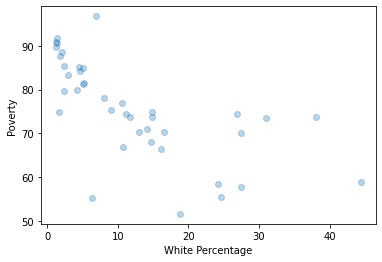

In [13]:
print("The correlation is {:.2f}".format(final_ds["%_white"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_white"],final_ds["%_poverty"],alpha = 0.3)
plt.xlabel("White Percentage")
plt.ylabel("Poverty")

The correlation is -0.53


Text(0, 0.5, 'Poverty')

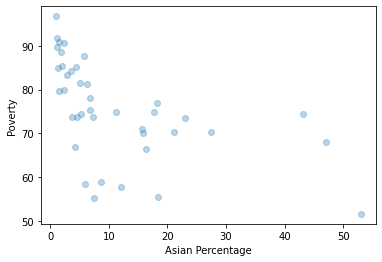

In [14]:
print("The correlation is {:.2f}".format(final_ds["%_asian"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_asian"],final_ds["%_poverty"],alpha = 0.3)
plt.xlabel("Asian Percentage")
plt.ylabel("Poverty")

The correlation is 0.37


Text(0, 0.5, 'Poverty')

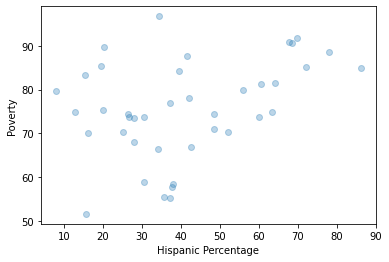

In [15]:
print("The correlation is {:.2f}".format(final_ds["%_hispanic"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_hispanic"],final_ds["%_poverty"],alpha = 0.3)
plt.xlabel("Hispanic Percentage")
plt.ylabel("Poverty")

The correlation is 0.33


Text(0, 0.5, 'Poverty')

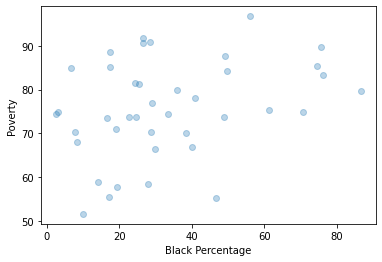

In [16]:
print("The correlation is {:.2f}".format(final_ds["%_black"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_black"],final_ds["%_poverty"],alpha = 0.3)
plt.xlabel("Black Percentage")
plt.ylabel("Poverty")

#### Relationship betwen mean student population and percent of unhoused students in each district per borough in scatterplots
The following scatterplots groups the dataframe by borough to show the relationship between mean student population and percent of students unhoused. Each point in the scatter plot is a district within the borough. We also found the correlation between both variables to see if student population size correlates with unhoused students. Each borough has their own scatter plot.

The correlation is 0.26


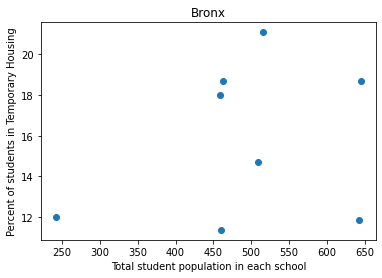

In [17]:
by_bronx = final_ds.loc[final_ds["borough"] == "Bronx"]
le_bronx = by_bronx.groupby("borough_and_district_#").mean()

print("The correlation is {:.2f}".format(le_bronx["#_total_students"].corr(le_bronx["%_students_in_temporary_housing"])))

plt.scatter(le_bronx["#_total_students"], le_bronx["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Bronx")
plt.show()

The correlation is -0.73


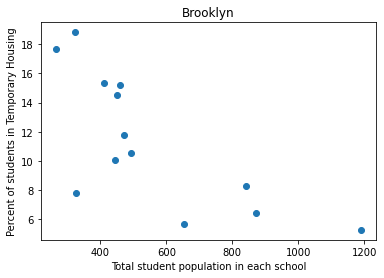

In [18]:
by_brooklyn = final_ds.loc[final_ds["borough"] == "Brooklyn"]
le_brooklyn = by_brooklyn.groupby("borough_and_district_#").mean()

print("The correlation is {:.2f}".format(le_brooklyn["#_total_students"].corr(le_brooklyn["%_students_in_temporary_housing"])))


plt.scatter(le_brooklyn["#_total_students"], le_brooklyn["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Brooklyn")
plt.show()


The correlation is 0.08


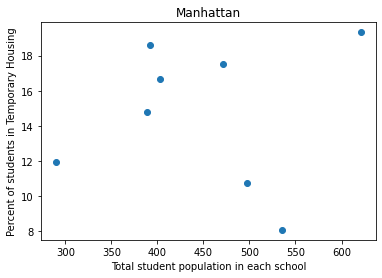

In [19]:
by_manhattan = final_ds.loc[final_ds["borough"] == "Manhattan"]
le_manhattan = by_manhattan.groupby("borough_and_district_#").mean()
print("The correlation is {:.2f}".format(le_manhattan["#_total_students"].corr(le_manhattan["%_students_in_temporary_housing"])))

plt.scatter(le_manhattan["#_total_students"], le_manhattan["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Manhattan")
plt.show()

The correlation is 0.81


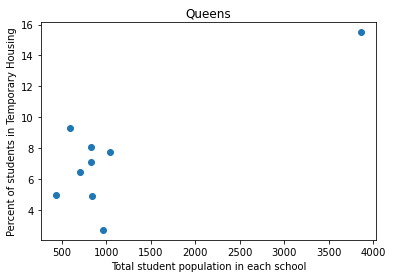

In [20]:
by_queens = final_ds.loc[final_ds["borough"] == "Queens"]
le_queens = by_queens.groupby("borough_and_district_#").mean()
print("The correlation is {:.2f}".format(le_queens["#_total_students"].corr(le_queens["%_students_in_temporary_housing"])))
plt.scatter(le_queens["#_total_students"], le_queens["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Queens")
plt.show()

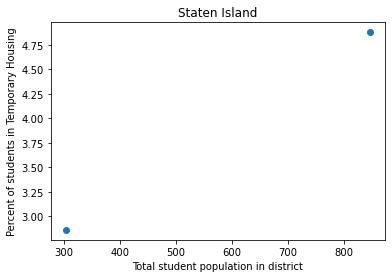

In [21]:
by_SI = final_ds.loc[final_ds["borough"] == "Staten Island"]
le_SI = by_SI.groupby("borough_and_district_#").sum()
plt.scatter(le_SI["#_total_students"], le_SI["%_students_in_temporary_housing"])
plt.xlabel("Total student population in district")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Staten Island")
plt.show()

# Questions for Reviewers
* Since we wanted to work on different datasets that all looked at different quality of life outcomes across different areas in New York City, what would be suggestions on how to combine our analyses to create a cohesive project?

* Are there any particular parts of our datasets that we cleaned that still seem unnecessary in answering our research questions?

* Based on what we have found and analyzed, is the direction we are going with in our research questions appropriate? Our main concern is that we wanted to explore a variety of factors and have that answer the main, overarching, question, but we were wondering if there was a more targeted and efficient question to pose instead?
